# Experiment 8
## Digital Signal Processing Lab

In [1]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import IPython
import scipy
import math
import control
import matplotlib
from scipy import signal as sp
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

#### Problem 1
Considering Ro, 'Basic Reproduction Number' to be 0.5,1.0,1.5

In [3]:
Ro = [0.5,1,1.5]
num = [1, 0]
den_1 = [1, -Ro[0]]
den_2 = [1, -Ro[1]]
den_3 = [1, -Ro[2]]
TF = control.TransferFunction([1,0],[1,-0.5],dt = True)
print("H(z) = {}".format(TF))

H(z) = 
   z
-------
z - 0.5



In [4]:
def pole_zero_plot(pole,zero):
    plt.plot(np.cos(theta),np.sin(theta),label = "Unit circle")
    plt.plot(np.real(pole),np.imag(pole),'rx',label = "Poles")
    plt.plot(np.real(zero),np.imag(zero),'go',label = "Zeros")
    plt.xlabel("Real axis")
    plt.ylabel("Imaginary Axis")
    plt.title("Pole Zero plot of the transfer function")
    plt.legend(loc = 'upper right')
    plt.tick_params(axis = 'both')
    plt.grid()

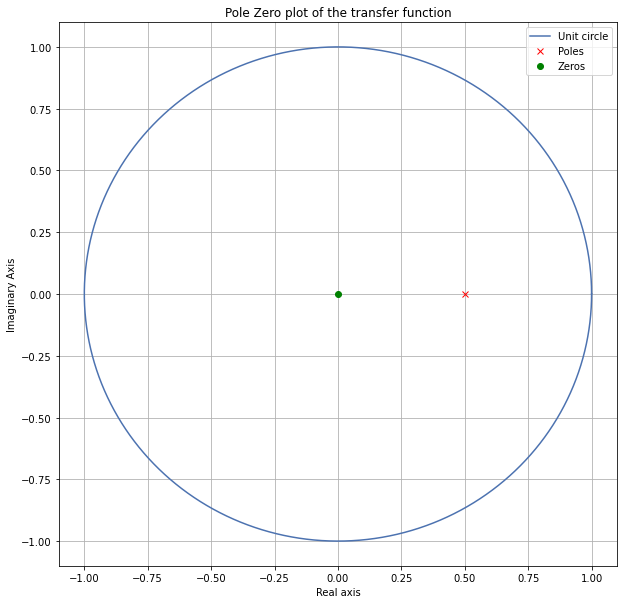

In [5]:
z,p,k = sp.tf2zpk(num,den_1)
theta = np.arange(0,2*pi, 0.0001)

plt.figure(figsize = (10,10))
pole_zero_plot(p,z)
plt.savefig("Experiment-8/Results/polezero_1")

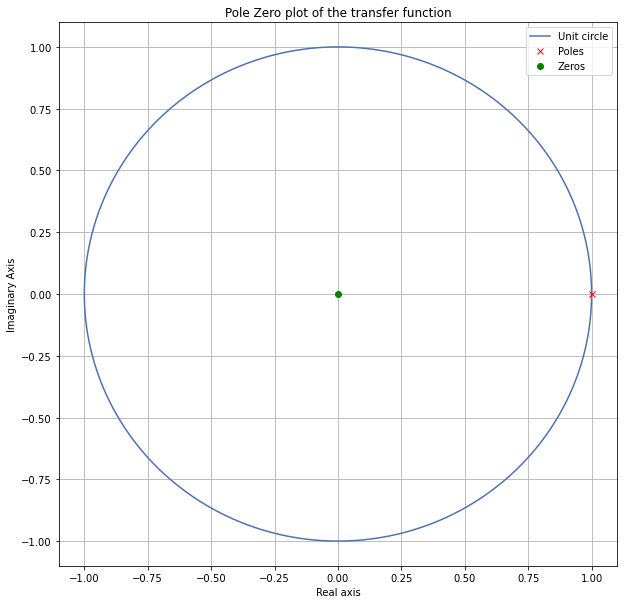

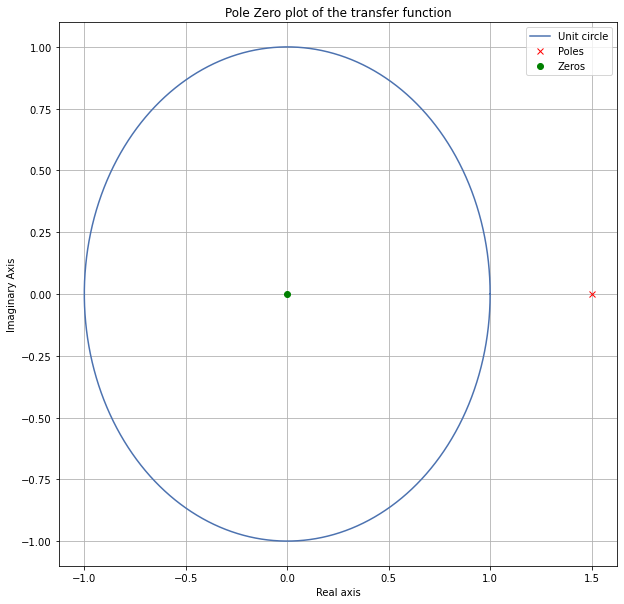

In [6]:
z,p,k = sp.tf2zpk(num,den_2)
plt.figure(figsize = (10,10))
pole_zero_plot(p,z)
plt.savefig("Experiment-8/Results/polezero_2")

z,p,k = sp.tf2zpk(num,den_3)
plt.figure(figsize = (10,10))
pole_zero_plot(p,z)
plt.savefig("Experiment-8/Results/polezero_3")

Solving the difference equation,<br>
$y(n) - Ro\cdot y(n-1) = \delta (n)$<br>
Applying z-transform,<br>
$Y(z) = \frac{z}{z-Ro} \implies y(n) = (Ro)^n $.<br>

Thus for the system to be stable, $Ro \leq 1$ or in other words, The pole should lie within the unit circle


In [7]:
reach = 1000000
y = 0
Ro = 2.5
n = 0
while(y < reach):
    y = (Ro)**n
    n = n + 1
    
print("Number of days for the virus to reach 1 Million people:",n-1)

Number of days for the virus to reach 1 Million people: 16


In [8]:
data = pd.read_csv('Experiment-8/case_time_series.csv')
print(data)
print("Size of the dataframe:",data.shape)

                Date    Date_YMD  Daily Confirmed  Total Confirmed  \
0    30 January 2020  2020-01-30                1                1   
1    31 January 2020  2020-01-31                0                1   
2    1 February 2020  2020-02-01                0                1   
3    2 February 2020  2020-02-02                1                2   
4    3 February 2020  2020-02-03                1                3   
..               ...         ...              ...              ...   
636  27 October 2021  2021-10-27            16351         34231030   
637  28 October 2021  2021-10-28            14307         34245337   
638  29 October 2021  2021-10-29            14215         34259552   
639  30 October 2021  2021-10-30            12940         34272492   
640  31 October 2021  2021-10-31            12907         34285399   

     Daily Recovered  Total Recovered  Daily Deceased  Total Deceased  
0                  0                0               0               0  
1              

In [9]:
cases = data['Daily Confirmed']

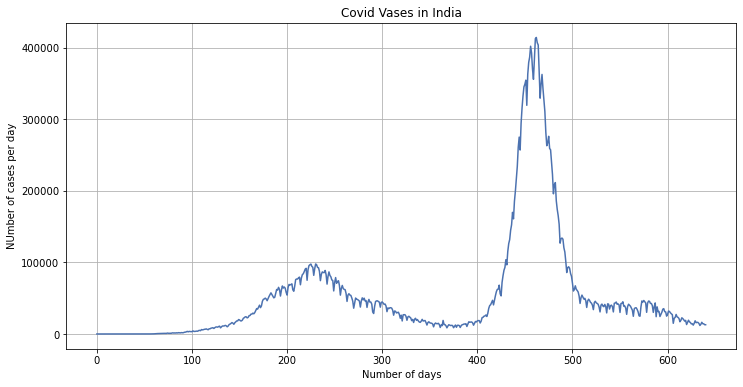

In [10]:
n = np.arange(0,641)
plt.plot(n,cases)
plt.xlabel("Number of days")
plt.ylabel("NUmber of cases per day")
plt.title("Covid Vases in India")
plt.grid()

plt.savefig("Experiment-8/Results/covid_india")

In [11]:
#Here, Ro at 100,
Ro = np.zeros(10)
for i in range(100,700,100):
    Ro[int(i/100)] = cases[i]**(1/i) 

for i in range(1,7):
    print("Basic Reproduction rate at day {} : {}".format(i*100,Ro[i]))

Basic Reproduction rate at day 100 : 1.0839704354910333
Basic Reproduction rate at day 200 : 1.0560243179325675
Basic Reproduction rate at day 300 : 1.036336973240976
Basic Reproduction rate at day 400 : 1.0248434993658257
Basic Reproduction rate at day 500 : 1.0225923252287676
Basic Reproduction rate at day 600 : 1.0171725024298686


Here, the value of Ro is varying on each date. Hence,this method isn't a good measure for estimating Ro. Some of the reliable methods may be maximum likelihood estimation, simple linear regression, Bayesian computation method etc.

In [12]:
# Asuuming integrator to be first order low pass filter
Integrator = control.TransferFunction([1, 0],[1, -1], dt = True)
print("H(z) = ",Integrator)

H(z) =  
  z
-----
z - 1



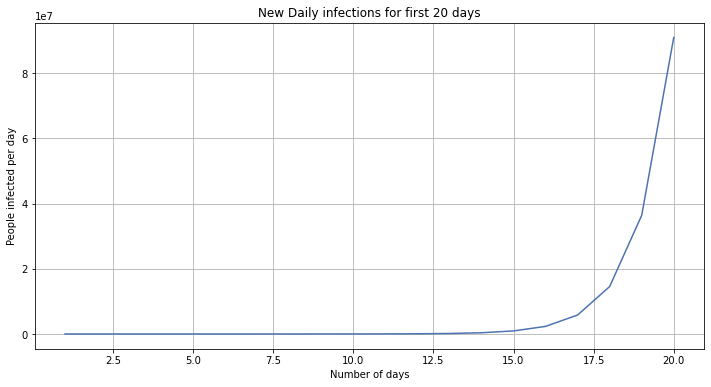

In [13]:
# given Ro = 2.5,
n = np.arange(1,21)
y = np.zeros(20)

for i in range(1,21):
    y[i-1] = 2.5**(i)
    
plt.plot(n,y)
plt.grid()
plt.xlabel('Number of days')
plt.ylabel('People infected per day')
plt.title("New Daily infections for first 20 days")

plt.savefig("Experiment-8/Results/20days_new")

Total number of infections after 20 days: 151582448


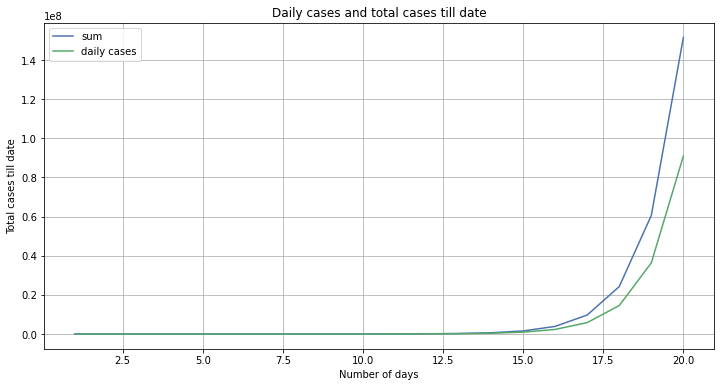

In [14]:
inte = sp.lfilter([1, 0],[1, -1],y)
plt.plot(n,inte,label='sum')
plt.plot(n,y,label='daily cases')
plt.xlabel("Number of days")
plt.ylabel("Total cases till date")
plt.title("Daily cases and total cases till date")
plt.grid()
plt.legend()
plt.savefig("Experiment-8/Results/20days_total")

print("Total number of infections after 20 days:",int(inte[19]))

#### Problem 2 : Increasing Complexity

In [15]:
a = [0.1, 0.15, 0.25, 0.26, 0.34, 0.42, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1];
num = [1,0,0,0,0,0,0,0,0,0,0,0,0];
den = np.hstack([np.ones(1),np.multiply(-1,a)])
print(control.TransferFunction(num,den,dt = True))


                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



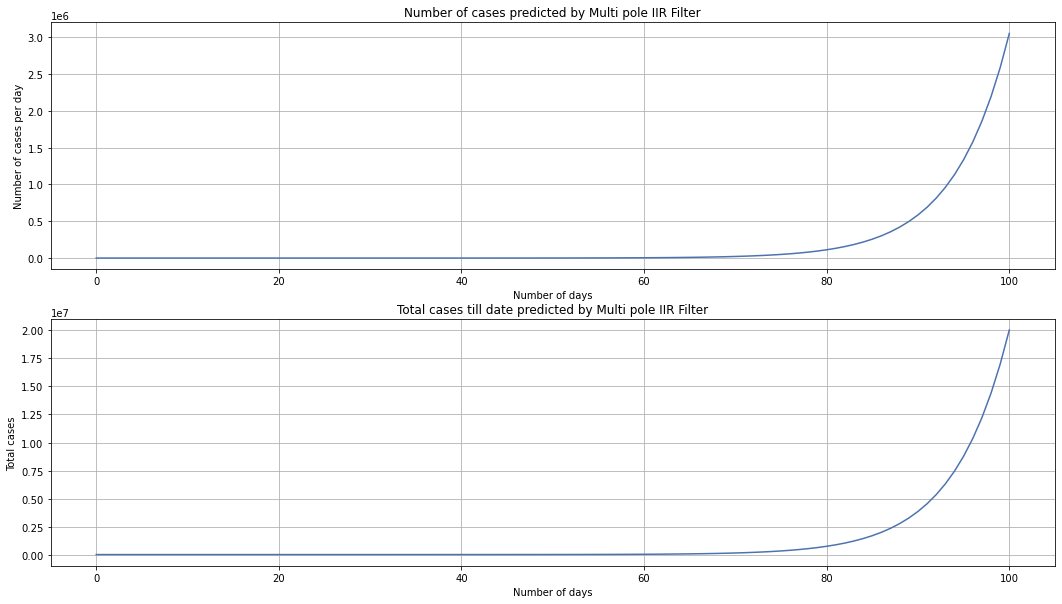

In [16]:
n = np.arange(0,101)
delta = np.hstack([np.ones(1),np.zeros(100)])
Y = sp.lfilter(num,den,delta)

plt.figure(figsize = (18,10))
plt.subplot(2,1,1)
plt.plot(n,Y,label = "Number of cases per day")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.title("Number of cases predicted by Multi pole IIR Filter")

#Using integrator filter
plt.subplot(2,1,2)
int_Y = sp.lfilter([1, 0],[1, -1],Y)
plt.plot(n,int_Y,label = "Total cases till day")
plt.title("Total cases till date predicted by Multi pole IIR Filter")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()

plt.savefig("Experiment-8/Results/IIR_newandtotal")

In [17]:
for i in range(0,100):
    if Y[i] >= 1000000:
        print("Number of days for the virus to reach 1M cases:",n[i])
        break

Number of days for the virus to reach 1M cases: 94


#### Problem 3 : Effects of Social Distancing

In [18]:
#Now,
rho = [0.25,0.5,0.75];
a = [0.1, 0.15, 0.25, 0.26, 0.34, 0.42, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1];
num = [1,0,0,0,0,0,0,0,0,0,0,0,0];

den_r1 = np.hstack([np.ones(1),np.multiply(-1*(1-rho[0]),a)])
den_r2 = np.hstack([np.ones(1),np.multiply(-1*(1-rho[1]),a)])   
den_r3 = np.hstack([np.ones(1),np.multiply(-1*(1-rho[2]),a)])

#print(control.TransferFunction(num,den_r1,dt = True))
#print(control.TransferFunction(num,den_r2,dt = True))
#print(control.TransferFunction(num,den_r3,dt = True))

Number of days to get zero cases: 34


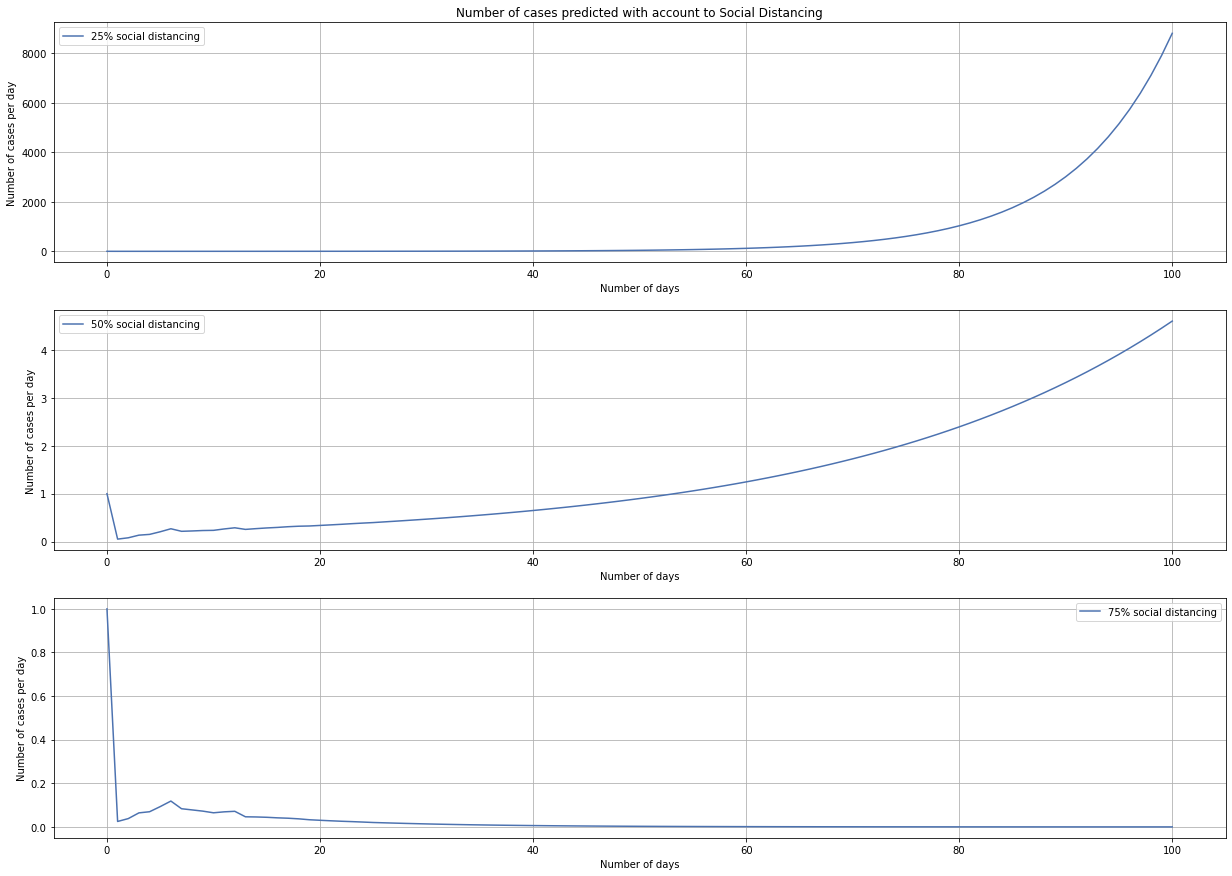

In [19]:
n = np.arange(0,101)
delta = np.hstack([np.ones(1),np.zeros(100)])
Y_1 = sp.lfilter(num,den_r1,delta)
Y_2 = sp.lfilter(num,den_r2,delta)
Y_3 = sp.lfilter(num,den_r3,delta)

plt.figure(figsize = (21,15))
plt.subplot(3,1,1)
plt.title("Number of cases predicted with account to Social Distancing")
plt.plot(n,Y_1,label = "25% social distancing")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.legend()

plt.subplot(3,1,2)
plt.plot(n,Y_2,label = "50% social distancing")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.legend()

plt.subplot(3,1,3)
plt.plot(n,Y_3,label = "75% social distancing")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.legend()

plt.savefig("Experiment-8/Results/social_distancing")

for i in n:
    if Y_3[i] < 10**(-2):
        print("Number of days to get zero cases:",i)
        break

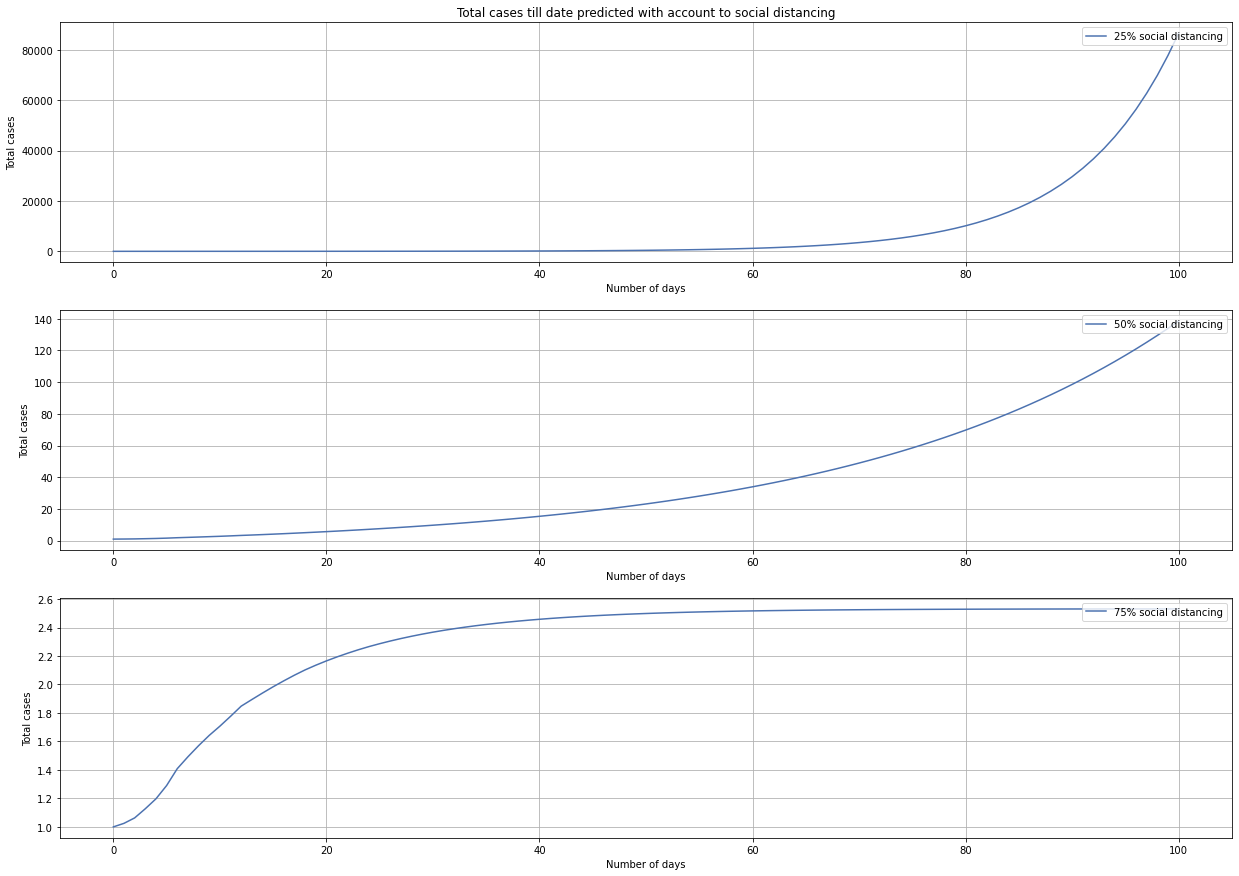

In [20]:
#Using integrator filter
int_Y1 = sp.lfilter([1, 0],[1, -1],Y_1)
int_Y2 = sp.lfilter([1, 0],[1, -1],Y_2)
int_Y3 = sp.lfilter([1, 0],[1, -1],Y_3)

plt.figure(figsize = (21,15))
plt.subplot(3,1,1)
plt.title("Total cases till date predicted with account to social distancing")
plt.plot(n,int_Y1,label = "25% social distancing")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()
plt.legend(loc = 'upper right')

plt.subplot(3,1,2)
plt.plot(n,int_Y2,label = "50% social distancing")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()
plt.legend(loc = 'upper right')

plt.subplot(3,1,3)
plt.plot(n,int_Y3,label = "75% social distancing")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()
plt.legend(loc = 'upper right')

plt.savefig("Experiment-8/Results/social_distancing_total")

####  Problem 4 : Saturation and Towards Normality

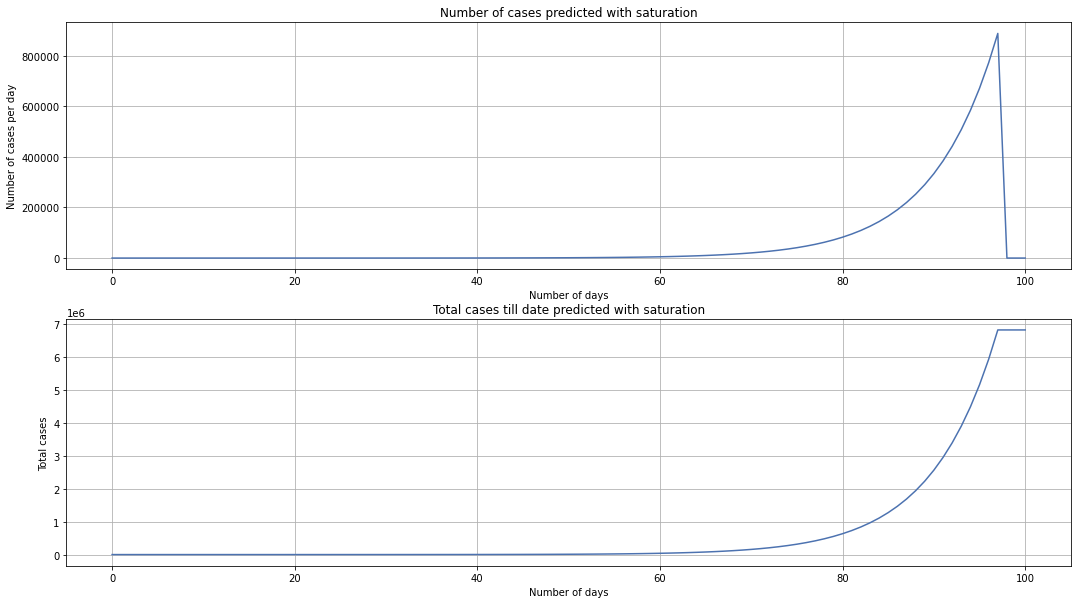

In [21]:
# given Ro = 1.15
n = np.arange(0,101)
y = np.zeros(101)
Ro = 1.15
K = 1e6

for i in range(1,101):
    y[i-1] = Ro**(n[i])
    if y[i-1] > K:
        y[i - 1] = 0
    
plt.figure(figsize = (18,10))
plt.subplot(2,1,1)
plt.plot(n,y,label = "Number of cases per day")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.title("Number of cases predicted with saturation")

#Using integrator filter
plt.subplot(2,1,2)
int_Y = sp.lfilter([1, 0],[1, -1],y)
plt.plot(n,int_Y,label = "Total cases till day")
plt.title("Total cases till date predicted with saturation")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()

plt.savefig("Experiment-8/Results/saturation")

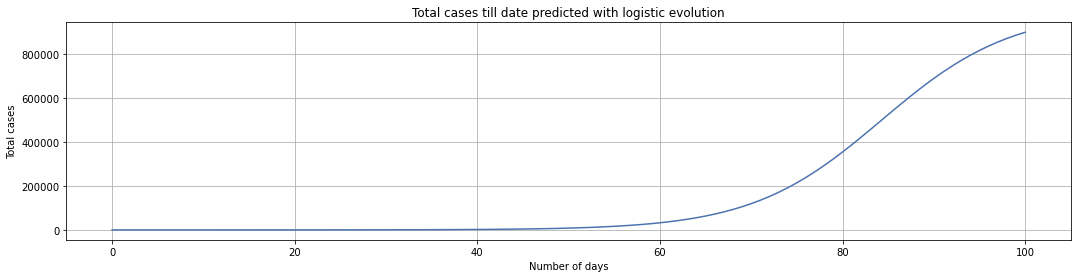

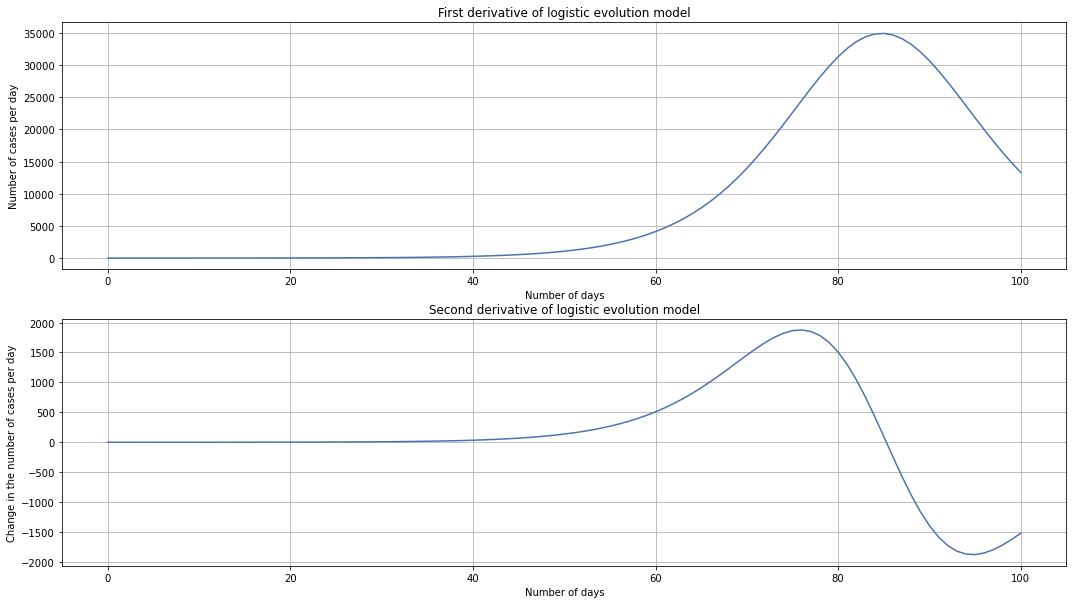

In [22]:
#print(control.TransferFunction([1,-1],[1,0],dt = True))
#print(n)
n = np.arange(0,101)
int_logistic = np.zeros(101)
for i in n:
    int_logistic[i] = ( K/(1+ Ro**(-i-1)*(K*(Ro - 1) - Ro))) - (1/(Ro-1))
    
y_logistic = sp.lfilter([1, -1],[1, 0],int_logistic)
yhat_logistic = sp.lfilter([1,-2, 1],[1,0,0],int_logistic)



#Using integrator filter
plt.figure(figsize = (18,4))
plt.plot(n,int_logistic,label = "Total cases till day")
plt.title("Total cases till date predicted with logistic evolution")
plt.xlabel("Number of days")
plt.ylabel("Total cases")
plt.grid()
plt.savefig("Experiment-8/Results/logistic_sum")

plt.figure(figsize = (18,10))
plt.subplot(2,1,1)
plt.plot(n,y_logistic,label = "Total cases till day")
plt.xlabel("Number of days")
plt.ylabel("Number of cases per day")
plt.title("First derivative of logistic evolution model")
plt.grid()

plt.subplot(2,1,2)
plt.plot(n,yhat_logistic,label = "Number of cases per day")
plt.grid()
plt.xlabel("Number of days")
plt.ylabel("Change in the number of cases per day")
plt.title("Second derivative of logistic evolution model")
plt.savefig("Experiment-8/Results/logistic_new")

In [23]:
print("Number of cases per day reached peak at day",n[np.argmax(y_logistic)])

Number of cases per day reached peak at day 85


In [24]:
def zero_cross_detector(n,X):
    for i in range(1,len(n)-1):
        if(X[i]> 0 ):
            if ((X[i-1]> 0) & (X[i+1] < 0)):
                print("Number of cases per day reached peak at day",i)
        else:
            if ((X[i-1]< 0) & (X[i+1] > 0)):
                print("Number of cases per day reached peak at day",i)

In [25]:
zero_cross_detector(n,yhat_logistic)

Number of cases per day reached peak at day 85
